#  Tarea 2 | Amaro-Alcalá David

##  Ejercicio 1

Creamos diez datos aleatorios.

In [1]:
aleas = randn(10)

10-element Array{Float64,1}:
 -0.772143
  0.773134
  1.12138 
  0.532148
 -1.29523 
 -0.773597
 -1.04053 
 -0.887683
 -0.971733
 -0.864367

In [6]:
function histograma(nhist)
    # código
end

histograma (generic function with 1 method)

In [2]:
nhis = 3

3

Se juega con las funciones `max` y `min`.

In [3]:
max(aleas...)

1.1213800545291968

In [4]:
min(aleas...)

-1.2952341083226764

Definimos una cantidad que se usa después.

In [5]:
Δx = (max(aleas...) - min(aleas...))/nhis

0.8055380542839577

Quiero ver los intervalos.

In [14]:
a = min(aleas...)

for i in 1:nhis+1
    println(a)
    a += Δx
end

-1.2952341083226764
-0.48969605403871863
0.3158420002452391
1.121380054529197


Haciendo caso de la advertencia, tenemos que pensar la forma en la que poder tener que leer sólo una vez los datos. Esto es leemos un valor y aumentamos un "vector" en la entrada que corresponde al intervalo donde cae el valor.

In [17]:
a = min(aleas...)
res = zeros(nhis+1)
for i in 1:nhis+1
    if aleas[2] <= a + Δx && aleas[2] >= a
        res[i] += 1
    end
    a += Δx
end

In [18]:
res

4-element Array{Float64,1}:
 0.0
 0.0
 1.0
 0.0

Definimos la función `paso` que para un único valor, nos devuelve el vector con el valor que corresponde al intervalo en el que cae el valor, aumentado. En matemáticas: Si $\mathrm{valor} \in R_n$ entonces, $\mathrm{Vector}[R_n]++$.

In [1]:
"""
Función `paso`. Recibe __dos__ argumentos:

1. `valor`: Valor numérico que se va a buscar su lugar en algún intervalo.
2. `res`: Vector resultado de aumentar el valor que corresponde al intervalo en el que cae  `valor`.
"""

function paso(valor, res)
    a = min(aleas...)
    for i in 1:nhis+1
        if valor <= a + Δx && valor >= a
            res[i] += 1
        end
        a += Δx
    end
    res
end

paso (generic function with 1 method)

In [2]:
?paso

search: 

Función `paso`. Recibe __dos__ argumentos:

1. `valor`: Valor numérico que se va a buscar su lugar en algún intervalo.
2. `res`: Vector resultado de aumentar el valor que corresponde al intervalo en el que cae  `valor`.


paso parsefloat ParseError AbstractSparseVector PartialQuickSort parse



In [28]:
paso(aleas[2],zeros(nhis+1))

4-element Array{Float64,1}:
 0.0
 0.0
 1.0
 0.0

In [3]:
"""
Función `completa` evalúa `paso` para cada uno de los valores en `listaValores`.
"""

function completo(listaValores)
    res = zeros(nhis + 1)
    for i in 1:length(listaValores)
        res = paso(listaValores[i], res)
    end
    res
end

completo (generic function with 1 method)

In [30]:
juas = completo(aleas)

4-element Array{Float64,1}:
 7.0
 0.0
 3.0
 0.0

In [35]:
min(aleas...) + Δx

-0.48969605403871863

In [34]:
min(aleas...) + 2Δx

0.3158420002452391

In [36]:
min(aleas...) + 3Δx

1.121380054529197

In [31]:
aleas

10-element Array{Float64,1}:
 -0.772143
  0.773134
  1.12138 
  0.532148
 -1.29523 
 -0.773597
 -1.04053 
 -0.887683
 -0.971733
 -0.864367

Vemos que sí funciona. Vamos a poner todo en una función.

Implementamos las funciones de arriba con mejores nombres y las usamos para generar el histograma.

In [4]:
function paso(valor, res, Δx,nhist,minimo)
    a = minimo
    for i in 1:nhist+1
        if valor <= a + Δx && valor >= a
            res[i] += 1
        end
        a += Δx
    end
    res
end

paso (generic function with 1 method)

In [5]:
function completo(listaValores,nhist,Δx)
    res = zeros(nhist + 1)
    minimo = min(listaValores...)
    for i in 1:length(listaValores)
        res = paso(listaValores[i], res, Δx,nhist,minimo)
    end
    res
end

completo (generic function with 1 method)

In [4]:
"""
`hiper` es la función que recibe el número de intervalos que deseamos tener.
Calcula `Δx` y se lo pasa a `completo`. 
"""

function hiper(nhist)
    aleas = randn(100)
    Δx = (max(aleas...) - min(aleas...))/nhist
    completo(aleas,nhist,Δx)
end

hiper (generic function with 1 method)

In [5]:
?hiper

search: 

`hiper` es la función que recibe el número de intervalos que deseamos tener. Calcula `Δx` y se lo pasa a `completo`. 


hiper with_bigfloat_precision



In [6]:
"""
`histograma` Recibe el número de intervalos. Utilizando a `hiper` recibe
el vector que tiene el histograma. Utiliza un ciclo `for` para generar
"visualmente" el histograma en su versión horizontal.
"""

function histograma(n)
    valores = hiper(n)
    for i in 1:length(valores)
        print(": ")
        for j in 1:valores[i]
            print("|")
        end
        println("")
    end
end

histograma (generic function with 1 method)

In [1]:
using PyPlot

In [11]:
#writedlm("adf.txt", histograma(50))

: |

LoadError: LoadError: MethodError: `start` has no method matching start(::Void)
while loading In[11], in expression starting on line 1

|
: |||||
: ||||
: ||||
: |||||||
: ||||||||||||||||||||
: ||||||||||||||||||
: ||||||||||||||||||||||||||||||||
: |||||||||||||||||||||||||||||||||||||||||||||||||||||
: |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
: ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
: ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
: |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
: ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
: ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

###  Algunos ejemplitos

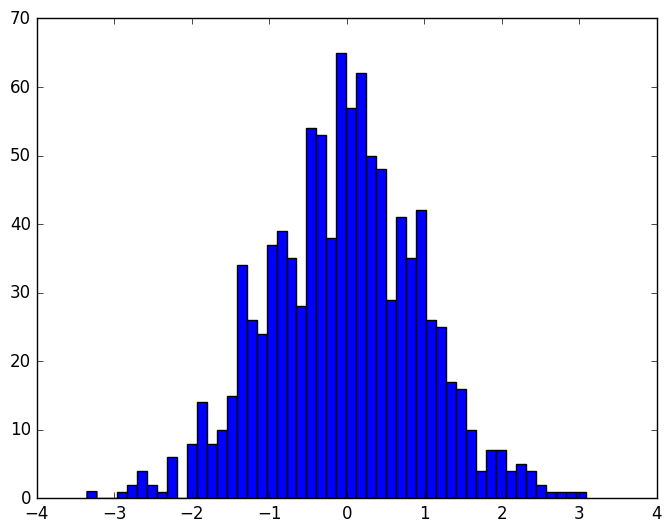

([1.0,0.0,0.0,1.0,2.0,4.0,2.0,1.0,6.0,0.0  …  7.0,7.0,4.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0],[-3.35104,-3.22231,-3.09359,-2.96486,-2.83613,-2.70741,-2.57868,-2.44995,-2.32123,-2.1925  …  1.92676,2.05548,2.18421,2.31294,2.44166,2.57039,2.69912,2.82784,2.95657,3.0853],Any[PyObject <matplotlib.patches.Rectangle object at 0x7fb86f0b79e8>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f0c3940>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f07dfd0>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f071940>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f088b00>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f07d7b8>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f0917b8>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f0916d8>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f088240>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86f091cc0>  …  PyObject <matplotlib.patches.Rectangle object at 0x7fb86eff7dd8>,PyObject <matplo

In [2]:
plt[:hist](randn(1000),50)

In [18]:
histograma(8)

: |||
: |||
: |||||||||||||||||
: |||||||||||||||||||||||
: ||||||||||||||||||||||||||
: |||||||||||||||||
: |||||||||
: ||
: |


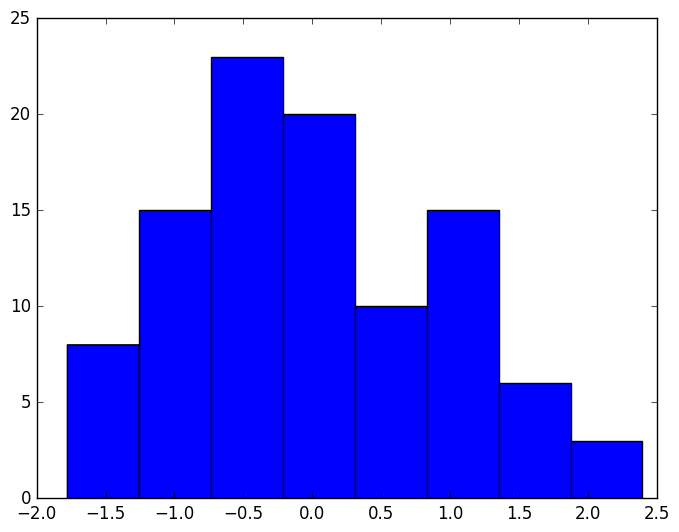

([8.0,15.0,23.0,20.0,10.0,15.0,6.0,3.0],[-1.777332075057199,-1.2555586898655988,-0.7337853046739986,-0.2120119194823984,0.3097614657092018,0.8315348509008018,1.3533082360924023,1.8750816212840027,2.396855006475603],Any[PyObject <matplotlib.patches.Rectangle object at 0x7fb86f07d198>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86ef150f0>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86eea6860>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86eeaaa58>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86ef1e668>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86ef1eb00>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86eeb7e80>,PyObject <matplotlib.patches.Rectangle object at 0x7fb86eeb7b00>])

In [19]:
plt[:hist](randn(100),8)